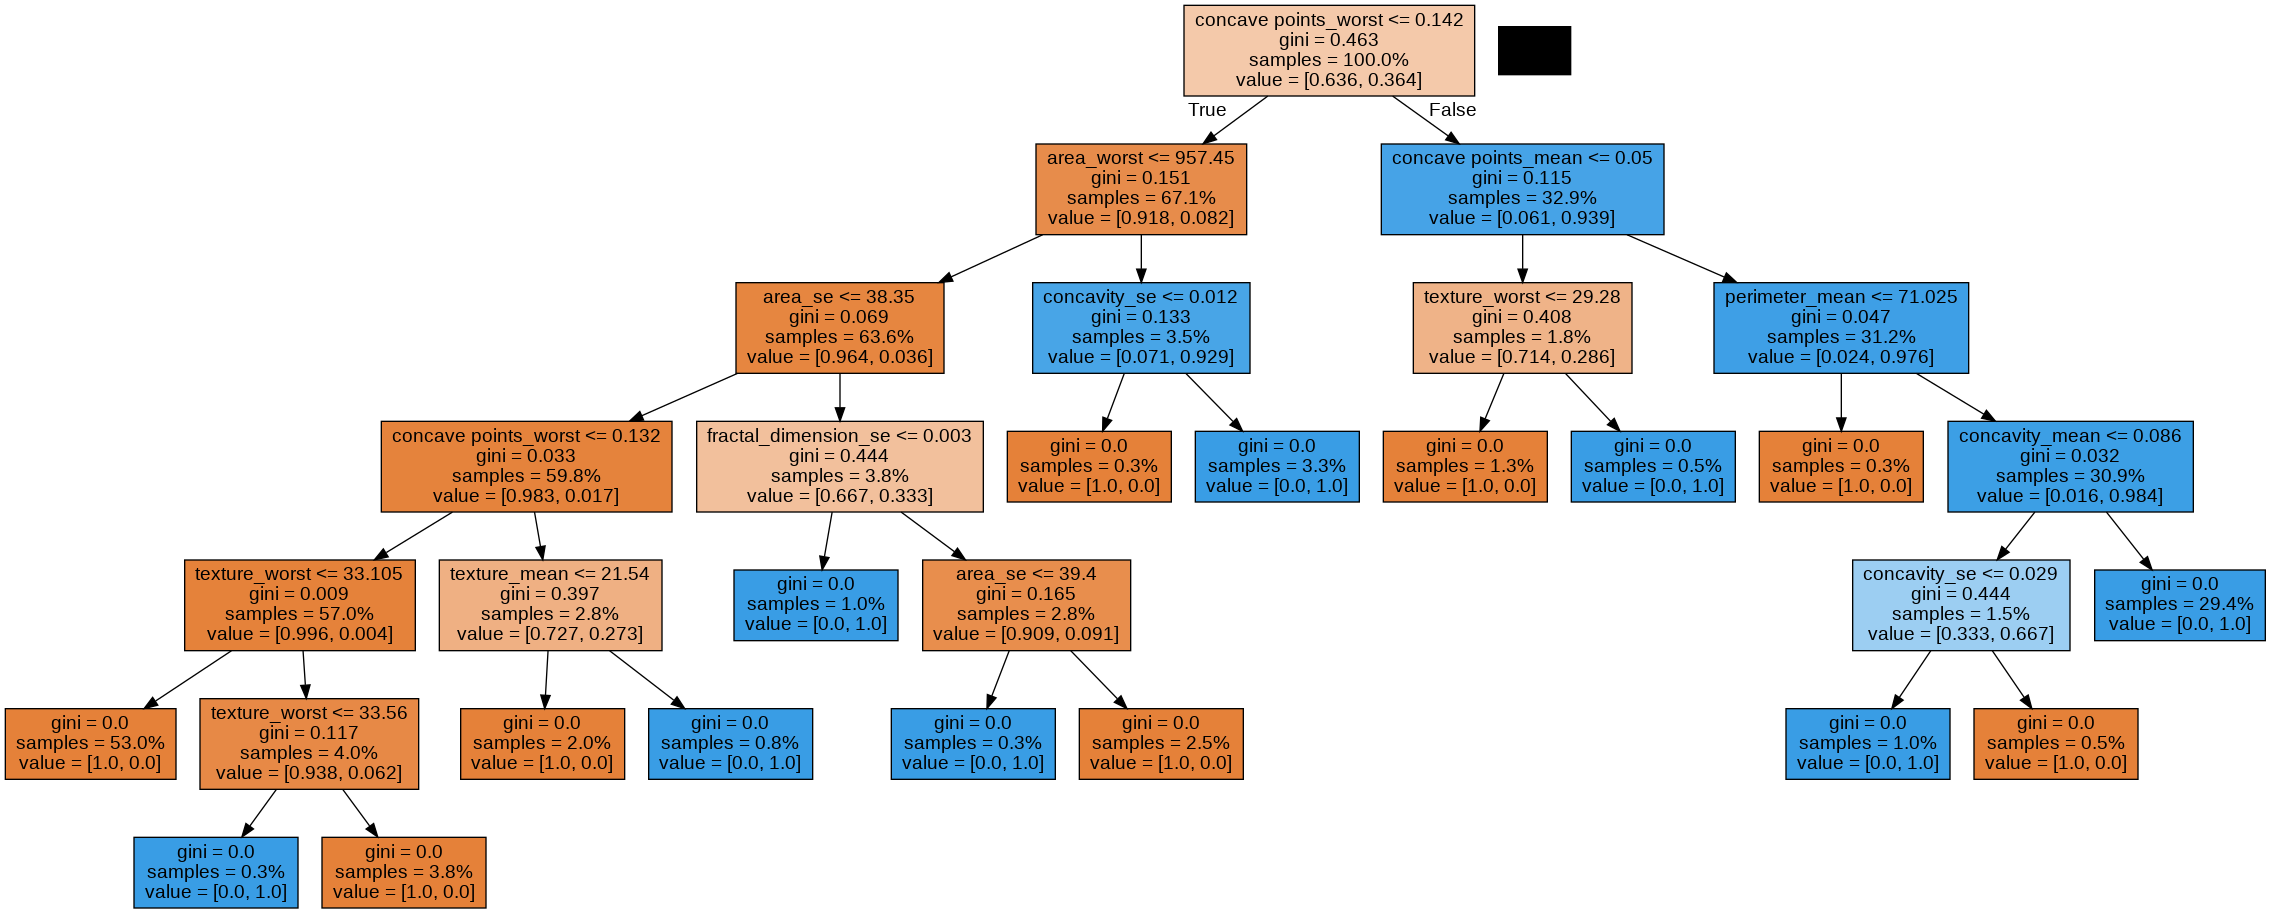

In [16]:
img

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
%matplotlib inline

rnd_state = 23468

In [2]:
data = pd.read_csv('Data/breast_cancer.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.drop('Unnamed: 32', axis=1, inplace=True)
data.diagnosis = np.where(data.diagnosis=='M', 1, 0) # Decode diagnosis into binary
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
model = TSNE(random_state=rnd_state, n_components=2)
representation = model.fit_transform(data.iloc[:, 2:])

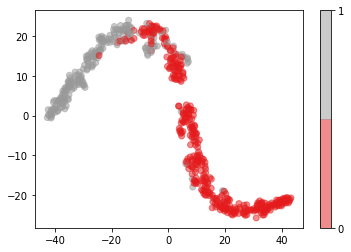

In [6]:
plt.scatter(representation[:, 0], representation[:, 1], 
            c=data.diagnosis, alpha=0.5, cmap=plt.cm.get_cmap('Set1', 2))
plt.colorbar(ticks=range(2));

In [7]:
predictors = data.iloc[:, 2:]
target = data.diagnosis

In [8]:
(predictors_train, predictors_test,
 target_train, target_test) = train_test_split(predictors, target, test_size = .3, random_state = rnd_state)

In [9]:
print('predictors_train:', predictors_train.shape)
print('predictors_test:', predictors_test.shape)
print('target_train:', target_train.shape)
print('target_test:', target_test.shape)

predictors_train: (398, 30)
predictors_test: (171, 30)
target_train: (398,)
target_test: (171,)


In [10]:
print(np.sum(target_train==0))
print(np.sum(target_train==1))

253
145


In [11]:
classifier = DecisionTreeClassifier(random_state = rnd_state).fit(predictors_train, target_train)

In [12]:
prediction = classifier.predict(predictors_test)

In [13]:
print('Confusion matrix:\n', pd.crosstab(target_test, prediction, colnames=['Actual'], rownames=['Predicted'], margins=True))
print('\nAccuracy: ', accuracy_score(target_test, prediction))

Confusion matrix:
 Actual       0   1  All
Predicted              
0           96   8  104
1            5  62   67
All        101  70  171

Accuracy:  0.9239766081871345


In [14]:
out = StringIO()
tree.export_graphviz(classifier, out_file = out, feature_names = predictors_train.columns.values, 
                     proportion = True, filled = True)

graph = pydotplus.graph_from_dot_data(out.getvalue())
img = Image(data = graph.create_png())

with open('output.png', 'wb') as f:
    f.write(img.data)

In [15]:
feature_importance = pd.Series(classifier.feature_importances_, index=data.columns.values[2:]).sort_values(ascending=False)
feature_importance

concave points_worst       0.707688
area_worst                 0.114771
concave points_mean        0.034234
fractal_dimension_se       0.026301
texture_worst              0.026300
area_se                    0.025201
concavity_se               0.024540
texture_mean               0.023671
perimeter_mean             0.010415
concavity_mean             0.006880
radius_worst               0.000000
radius_mean                0.000000
perimeter_worst            0.000000
symmetry_se                0.000000
compactness_worst          0.000000
concavity_worst            0.000000
symmetry_worst             0.000000
smoothness_worst           0.000000
compactness_se             0.000000
concave points_se          0.000000
smoothness_se              0.000000
perimeter_se               0.000000
texture_se                 0.000000
radius_se                  0.000000
fractal_dimension_mean     0.000000
symmetry_mean              0.000000
compactness_mean           0.000000
smoothness_mean            0